# Exploratory Data Analysis in Python
Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. 

Using data to answer questions

What is the average birth weight of babies in the United States?
    Find appropriate data, or collect it
    Read data in your development environment
    Clean and validate

In [5]:
import pandas as pd
nsfg = pd.read_hdf('datasets/nsfg.hdf5', 'nsfg')# NSFG National Survey of Family Growth data 
type(nsfg)

pandas.core.frame.DataFrame

In [6]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [7]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [8]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [9]:
# Each column is a Series
pounds = nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

In [10]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [11]:
#' Selecting columns
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

In [25]:
# Print the first 5 elements of ounces
print(ounces[:5])

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [27]:
pounds.value_counts().sort_index()
# Getting weight of babies

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
Name: birthwgt_lb1, dtype: int64

In [13]:
# Describe
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [15]:
# Replace
import numpy as np
pounds = pounds.replace([98, 99], np.nan)
pounds.mean()

6.703286384976526

In [16]:
ounces.replace([98, 99], np.nan, inplace=True)

In [17]:
# Arithmetic with Series
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [ ]:
# Filter and Visualize

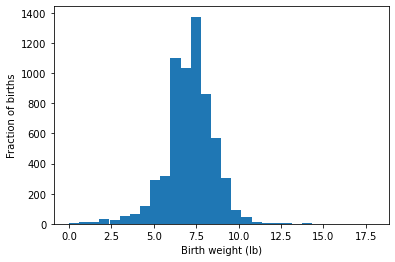

In [18]:
# Histogram
import matplotlib.pyplot as plt

plt.hist(birth_weight.dropna(), bins=30) # removing nulls and defining bins

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

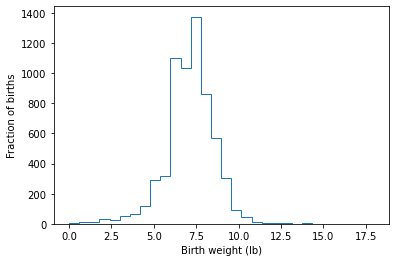

In [32]:
plt.hist(birth_weight.dropna(), bins=30, histtype='step') #unfilled histogram

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

In [19]:
# Boolean Series
preterm = nsfg['prglngth'] < 37 # result will be boolean series
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [20]:
# Boolean Series
preterm.sum() # treat true as 1 and false as null

3742

In [21]:
preterm.mean()  # give fraction of true 39%

0.39987176747168196

In [22]:
# Filtering
preterm_weight = birth_weight[preterm]  # fitler data
preterm_weight.mean()

5.577598314606742

In [23]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

In [ ]:
# Filtering
# Other logical operators:
# & for AND (both must be true)
# | for OR (either or both can be true)
# # Example:
# birth_weight[A & B] # both true
# birth_weight[A | B] # either or both true

In [ ]:
# Resampling
# NSFG is not representative
# Some groups are "oversampled"
# We can correct using resample_rows_weighted() # need to do statistics course to understand this resampling topic

In [28]:
nsfg['outcome'].value_counts()
# 1	Live birth
# 2	Induced abortion
# 3	Stillbirth
# 4	Miscarriage
# 5	Ectopic pregnancy
# 6	Current pregnancy

# How many pregnancies in this dataset ended with a live birth? Answer is 6489

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

In [30]:
# Print the values and their frequencies
#the number of babies born alive at the end of a pregnancy.
print(nsfg['nbrnaliv'].value_counts())

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.NaN, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [31]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


In [33]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


## PMF ( Probability mass functions)

In [ ]:
# Datasets
# GSS
# Annual sample of U.S. population.
# Asks about demographics, social and political beliefs.
# Widely used by policy makers and researchers.

In [34]:
# Read the data
gss = pd.read_hdf('datasets/gss.hdf5','gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


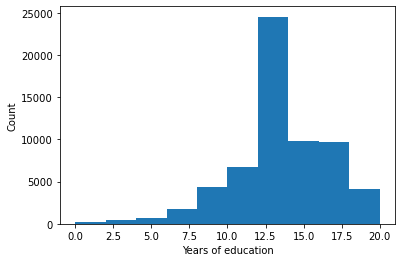

In [37]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.show()

In [39]:
!pip install empiricaldist

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=fcca1ccf4796a6dffb73864522977ca71157d02618651ab2d17658a1dc1be00c
  Stored in directory: c:\users\gaura\appdata\local\pip\cache\wheels\1a\33\5a\05bbe93cd4709e7a777f8379efb54114a8f7f6dcb3787805fb
Successfully built empiricaldist

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
#empiricaldist provides Pmf, which is a Pandas Series that represents a probability mass function.
from empiricaldist import Pmf
# PMF
pmf_educ = Pmf(educ)
#pmf_educ = Pmf(educ, normalize=False)
pmf_educ.head()

,probs
0,18.0
1,12.0
2,12.0


# Note CDF and PDF function graph is not working properly in this notebook for empricaldist package.
from empiricaldist import Cdf,pdf
All Cdf and Pdf graph are incorrect!!!

In [53]:
pmf_educ[12]

11.0

In [55]:
#pmf_educ = Pmf(educ, normalize=True)
pmf_educ = Pmf(educ)
pmf_educ.head()

,probs
0,18.0
1,12.0
2,12.0


In [56]:
pmf_educ[12]

11.0

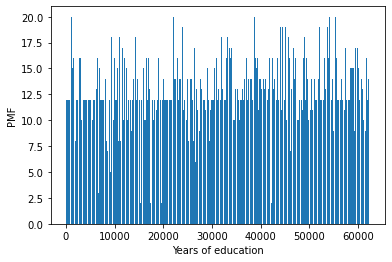

In [57]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

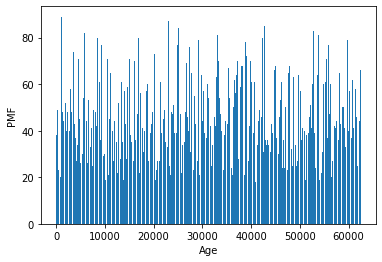

In [48]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

## Cumulative distribution functions
From PMF to CDF
    If you draw a random element from a distribution:
        PMF (Probability Mass Function) is the probability that you
        get exactly x
        CDF (Cumulative Distribution Function) is the probability that
        you get a value <= x
     for a given value of x.

    Example
    PMF of {1, 2, 2, 3, 5}
    PMF(1) = 1/5
    PMF(2) = 2/5
    PMF(3) = 1/5
    PMF(5) = 1/5
    CDF is the cumulative sum of
    the PMF.
    CDF(1) = 1/5
    CDF(2) = 3/5
    CDF(3) = 4/5
    CDF(5) = 1

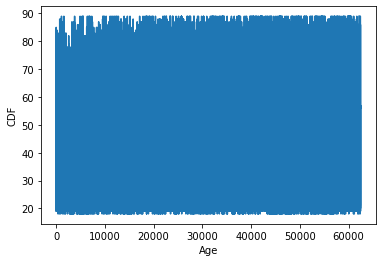

In [59]:
#empiricaldist provides Cdf, which is a Pandas Series that represents a Cumulative distribution function.
from empiricaldist import Cdf
cdf = Cdf(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [60]:
# Evaluating the CDF
q = 51
p = cdf(q)
print(p)

53.0


In [61]:
# Evaluating the inverse CDF
p = 0.25
q = cdf.inverse(p)
print(q)

0.0


In [62]:
p = 0.75
q = cdf.inverse(p)
print(q)

0.0


In [63]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


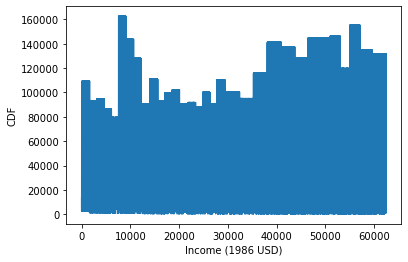

In [64]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Comparing distribution

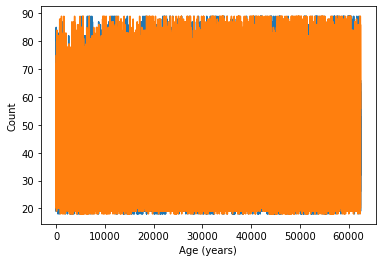

In [66]:
# Multiple PMFs
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]

Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

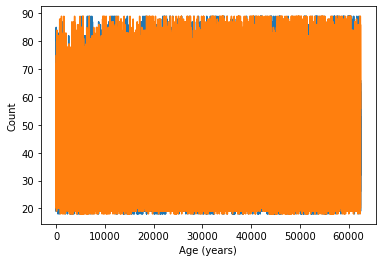

In [67]:
# Multiple CDFs
Cdf(male_age).plot(label='Male')
Cdf(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

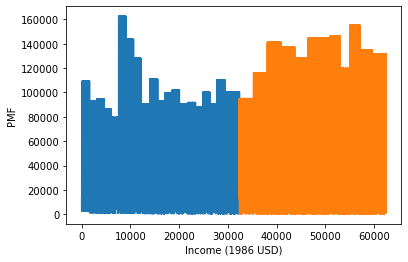

In [68]:
# Income distribution
income = gss['realinc']
pre95 = gss['year'] < 1995
Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()

<AxesSubplot:>

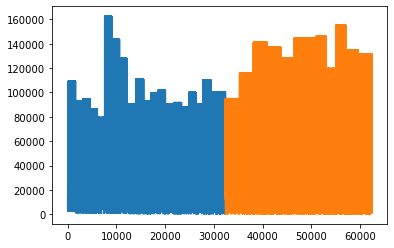

In [69]:
# Income CDFs
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')

In [71]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


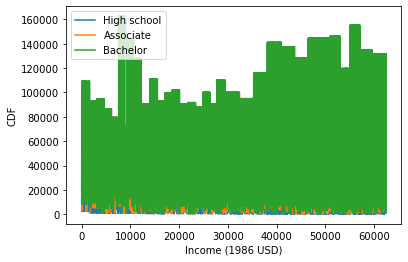

In [72]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Modeling distributions

<AxesSubplot:>

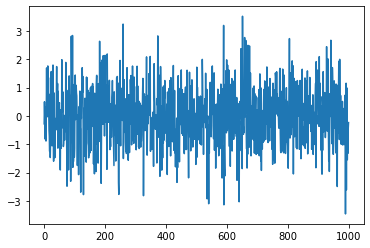

In [81]:
# The normal distribution
from empiricaldist import Cdf
sample = np.random.normal(size=1000)
Cdf(sample).plot()

<AxesSubplot:>

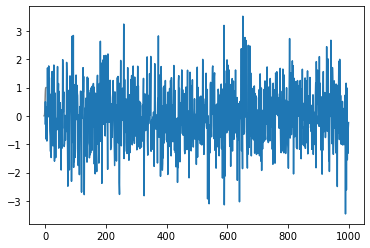

In [82]:
# The normal CDF
from scipy.stats import norm
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='gray')
Cdf(sample).plot()

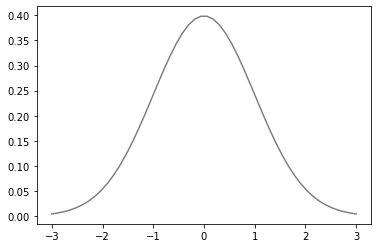

In [83]:
# The bell curve
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')

<AxesSubplot:ylabel='Density'>

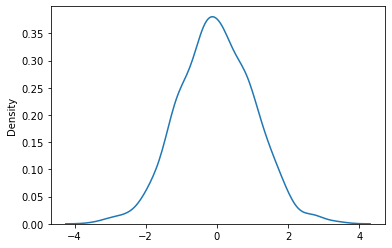

In [84]:
# KDE plot
import seaborn as sns
sns.kdeplot(sample)

<AxesSubplot:ylabel='Density'>

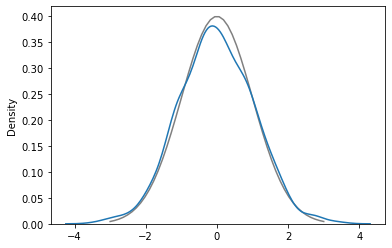

In [85]:
# KDE and PDF
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

In [ ]:
# PMF, CDF, KDE
# Use CDFs for exploration.
# Use PMFs if there are a small number of unique values.
# Use KDE if there are a lot of values.

In [86]:
# use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm()

4.371148677933652 0.4290082383271419


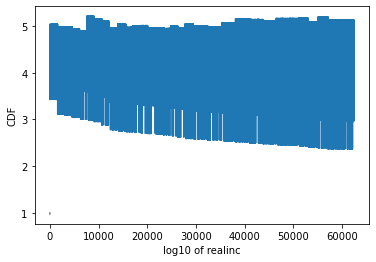

In [87]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

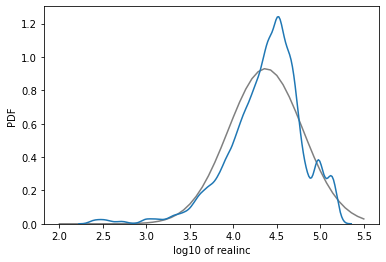

In [90]:
from scipy.stats import norm
dist = norm(mean, std)

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

# Exploring relationships

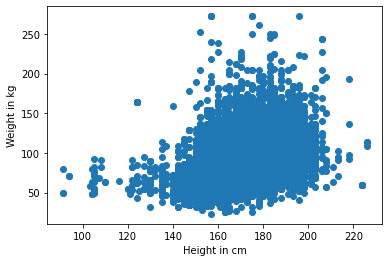

In [11]:
# BRFSS Behavioral Risk Factor surveillance systaem surevy of health-related 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

brfss = pd.read_hdf('datasets/brfss.hdf5','brfss')

height = brfss['HTM4']
weight = brfss['WTKG3']

plt.plot(height, weight,'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

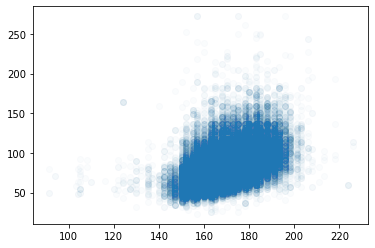

In [6]:
plt.plot(height, weight,'o', alpha=0.02) # Making transparency in plot
plt.show()

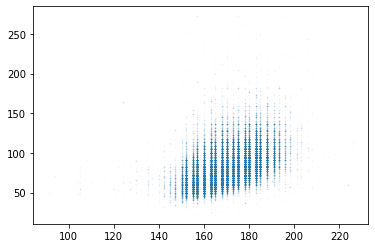

In [9]:
plt.plot(height, weight,'o', markersize=1, alpha=0.02) # Marker size
plt.show()

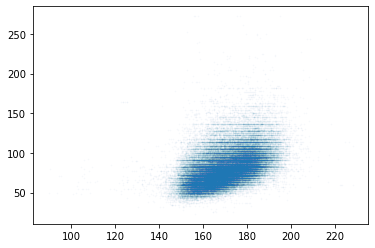

In [12]:
# Jittering ( adding noise)
height_jitter = height + np.random.normal(0, 2, size=len(brfss)) 
plt.plot(height_jitter, weight,'o', markersize=1, alpha=0.02)
plt.show()

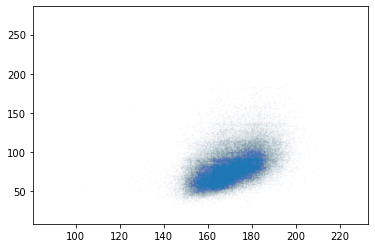

In [13]:
#More jittering in weight as well
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.01)
plt.show()

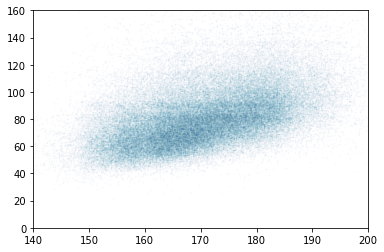

In [14]:
# Zoom in area for most of data points
plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.show()

In [ ]:
# from empiricaldist import Pmf
# # Extract age
# age = brfss['AGE']

# # Plot the PMF
# pmf_age = Pmf(age)
# pmf_age.bar()

# # Label the axes
# plt.xlabel('Age in years')
# plt.ylabel('PMF')
# plt.show()

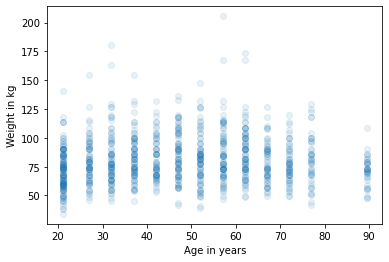

In [17]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o',alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

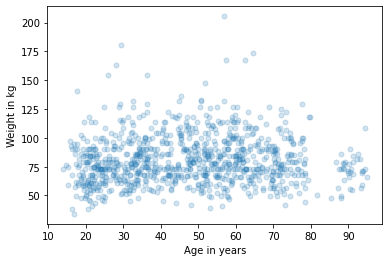

In [18]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o',markersize=5,alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

# Visualizing relatioship 

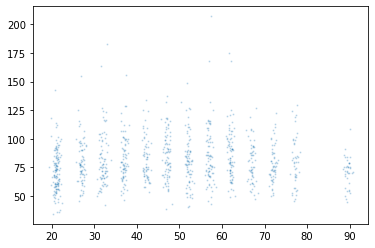

In [19]:
# More data
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight,'o', markersize=1, alpha=0.2)
plt.show()

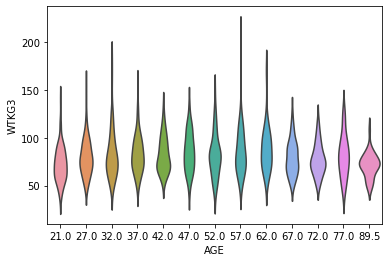

In [22]:
# Violin plot
import seaborn as sns
data = brfss.dropna(subset=['AGE','WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

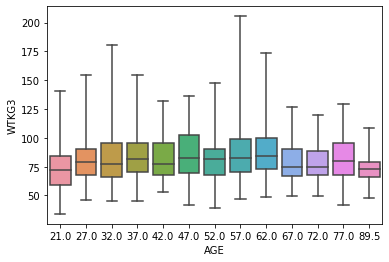

In [23]:
# Box plot
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()
# Max and min and middle line is median

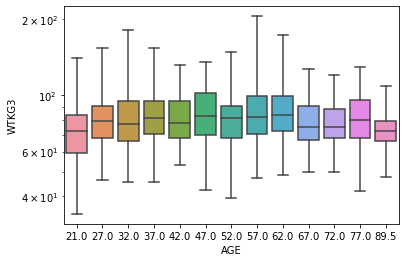

In [24]:
# Log scale
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

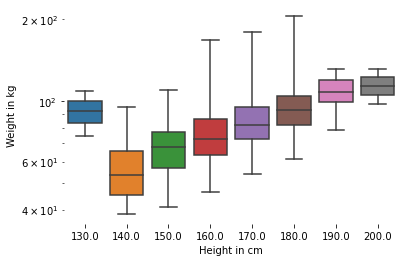

In [38]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10',y='WTKG3',data=data,whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


In [ ]:
# # Extract income
# income = brfss['INCOME2']

# # Plot the PMF
# Pmf(income).bar()

# # Label the axes
# plt.xlabel('Income level')
# plt.ylabel('PMF')
# plt.show()

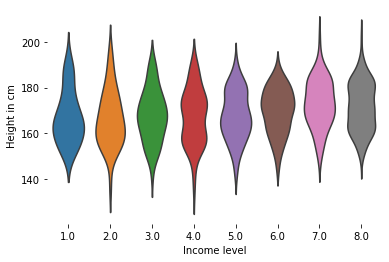

In [40]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2',y='HTM4',data=data,inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


# Correlation coefficient
Correlation coefficient
When people say "correlation" casually, they might mean any relationship between two variables. In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables.

if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. 

In [25]:
# Correlation coefficient
# Height with itself: 1
# Height and weight: 0.47
# Height and age: -0.09
# Weight and age: 0.02
columns = ['HTM4','WTKG3','AGE']
subset = brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.512347,-0.086079
WTKG3,0.512347,1.000000,0.051345
AGE,-0.086079,0.051345,1.000000


In [ ]:
# xs = np.linspace(-1, 1)
# ys = xs**2
# ys += normal(0, 0.05, len(xs))
# np.corrcoef(xs, ys)

In [30]:
# Strength of effect
from scipy.stats import linregress
# Hypothetical 1
res = linregress(xs, ys)
print(res)

LinregressResult(slope=-2.560043680312126e-17, intercept=0.346938775510204, rvalue=-4.862244557122017e-17, pvalue=0.9999999999999998, stderr=0.07599586418377655, intercept_stderr=0.04476271073425782)


In [31]:
# Strength of effect
# Hypothetical 2
res = linregress(xs, ys)
print(res)

LinregressResult(slope=-2.560043680312126e-17, intercept=0.346938775510204, rvalue=-4.862244557122017e-17, pvalue=0.9999999999999998, stderr=0.07599586418377655, intercept_stderr=0.04476271073425782)


In [34]:
# Regression line
subset = brfss.dropna(subset=['WTKG3','HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.9756429097243612, intercept=-85.06047892117603, rvalue=0.5123470895624024, pvalue=3.0310337770848186e-63, stderr=0.05374057063828036, intercept_stderr=9.15568593958697)


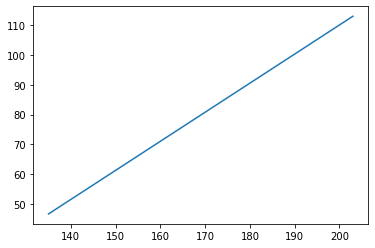

In [35]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy,'-')

In [36]:
# Nonlinear relationships
subset = brfss.dropna(subset=['WTKG3','AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.05653044488692333, intercept=78.09706621385563, rvalue=0.05134541160718097, pvalue=0.11724633465600308, stderr=0.03605504624816181, intercept_stderr=1.8523796517694036)


LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)


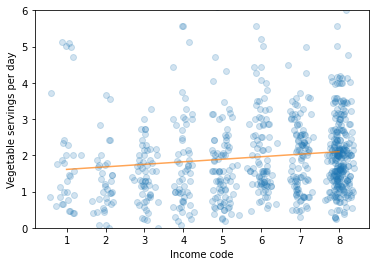

In [42]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

# Limits of simple regression

In [43]:
# Multiple regression
import statsmodels.formula.api as smf
results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()  # ordinary least square  ( another name for regression) 
results.params

Intercept    5.579385
_VEGESU1     0.189795
dtype: float64

In [49]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


In [44]:
# Income and education
gss = pd.read_hdf('datasets/gss.hdf5','gss')
results = smf.ols('realinc ~ educ', data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

In [45]:
# Adding age
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

In [46]:
# Income and age
grouped = gss.groupby('age')

Text(0, 0.5, 'Income (1986 $)')

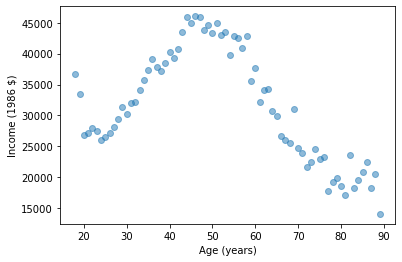

In [47]:
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age,'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

In [48]:
# Adding a quadratic term
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

In [ ]:
# Group by educ
grouped = gss.groupby['educ']

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ,'o',alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

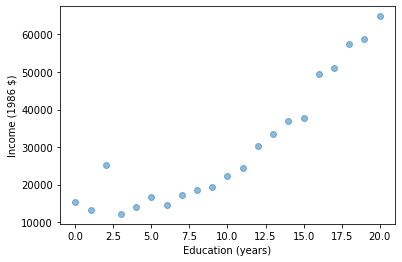

In [50]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ,'o',alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [51]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [ ]:
# Visualizing regression results

In [52]:
# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)

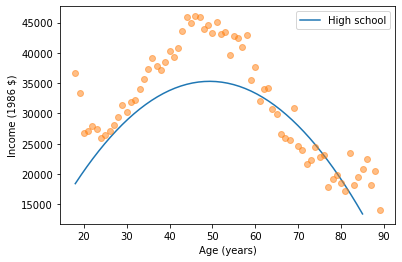

In [53]:
# Plotting predictions
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()

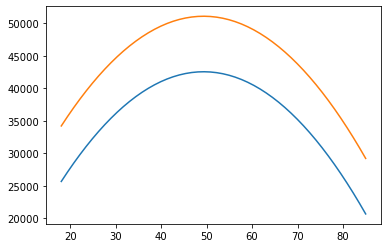

In [55]:
# Levels of education
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')

df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')

In [56]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


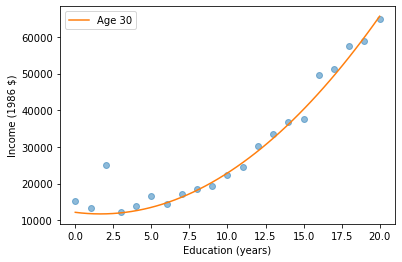

In [57]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o',alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# Logistic regression

In [ ]:
# Categorical variables
# Numerical variables: income, age, years of education.
# Categorical variables: sex, race.

In [58]:
# Sex and income
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

In [60]:
# Boolean variable
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [61]:
gss['gunlaw'].replace([2], [0], inplace=True)
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [62]:
# Logistic regression
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

In [63]:
# Generating predictions
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

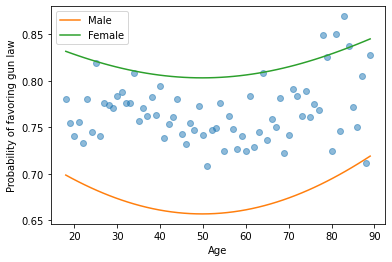

In [64]:
# Visualizing results
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


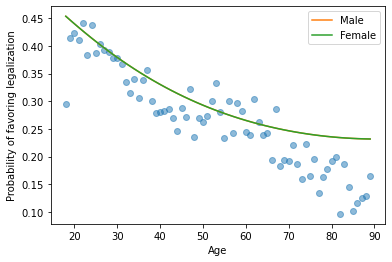

In [69]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred1, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

In [ ]:
# https://pypi.org/project/empiricaldist/

In [ ]:
# Exploratory Data Analysis
# Import, clean, and validate
# Visualize distributions
# Explore relationships between variables
# Explore multivariate relationships

# EXPLORATORY DATA ANALYSIS IN PYTHON
# CDF, PMF, and KDE
# Use CDFs for exploration.
# Use PMFs if there are a small number of unique values.
# Use KDE if there are a lot of values.

# Visualizing relationships
# Quantifying correlation
# Multiple regression
# Logistic regression

# Where to next?  ( DataCamp course )
# Statistical Thinking in Python
# pandas Foundations
# Improving Your Data Visualizations in Python
# Introduction to Linear Modeling in Python

# Think Stats ( Book recomendation)
# This course is based on Think
# Stats
# Published by O'Reilly and
# available free from
# thinkstats2.com